In [1]:
#dependencies 
import torch
import torchvision
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#downloading the dataset
train_set=datasets.FashionMNIST('',train=True,download=True,transform=transforms.Compose([transforms.ToTensor()]))
test_set=datasets.FashionMNIST('',train=False,download=True,transform=transforms.Compose([transforms.ToTensor()]))

Extracting FashionMNIST/raw/train-images-idx3-ubyte.gz to FashionMNIST/raw


Extracting FashionMNIST/raw/train-labels-idx1-ubyte.gz to FashionMNIST/raw



Extracting FashionMNIST/raw/t10k-images-idx3-ubyte.gz to FashionMNIST/raw


Extracting FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to FashionMNIST/raw
Processing...


/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:469: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:141.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


Done!


In [3]:
#to see how it looks like
train_set

Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: 
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
           )

In [4]:
classes=[]
for i in range(len(train_set)):
  classes.append(list(train_set[i])[1])

In [6]:
print(set(classes)) #printing the classes of FASHIONMNIST ; 10 classes

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}


In [16]:
training=DataLoader(train_set,batch_size=64,shuffle=True)
testing=DataLoader(test_set,batch_size=64,shuffle=True)

In [17]:
print(type(training))

<class 'torch.utils.data.dataloader.DataLoader'>


In [18]:
for data in training:
  print(data[1])
  break

tensor([9, 3, 7, 8, 0, 0, 6, 4, 6, 0, 4, 7, 5, 2, 3, 5, 9, 8, 0, 7, 7, 1, 1, 8,
        3, 3, 5, 3, 5, 9, 2, 8, 1, 3, 9, 1, 7, 6, 7, 0, 3, 2, 7, 5, 5, 6, 5, 4,
        5, 8, 5, 9, 5, 9, 5, 0, 8, 6, 3, 1, 0, 9, 7, 5])


In [19]:
train_list=list(training)
print('Batch 1 :',len(train_list[1][1])) #batch 1
print(len(train_list[1]))

Batch 1 : 64
2


In [20]:
#to determine the shape of the image
x,y=data[0],data[1]

In [21]:
x.shape #10 is the batch size , channel 1 , height and widht =28

torch.Size([64, 1, 28, 28])

So now we know that the dimensions of image are 28*28

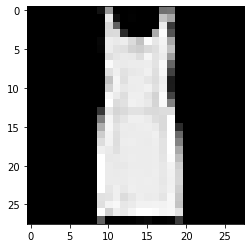

tensor(3)


In [22]:
plt.imshow(x[1].view(28,28),cmap='gray')
plt.show()
print(y[1]) #class number 

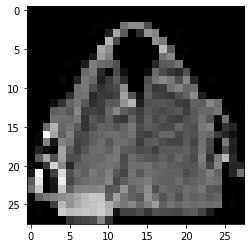

tensor(8)


In [23]:
plt.imshow(x[3].view(28,28),cmap='gray')
plt.show()
print(y[3])

In [24]:
# Labels/ Class Name
'''
0 T-shirt/top
1 Trouser
2 Pullover
3 Dress
4 Coat
5 Sandal
6 Shirt
7 Sneaker
8 Bag
9 Ankle boot
'''

'\n0 T-shirt/top\n1 Trouser\n2 Pullover\n3 Dress\n4 Coat\n5 Sandal\n6 Shirt\n7 Sneaker\n8 Bag\n9 Ankle boot\n'

In [15]:
#deep learning dependencies
import torch.nn as nn
import torch.nn.functional as f #for non-linear activation functions like relu, softmin, softmax, logsigmoid, etc

In [63]:
class Net(nn.Module):
  def __init__(self):
    super().__init__()
    self.fc1 = nn.Linear(784, 120)
    self.fc2 = nn.Linear(120, 120)
    self.fc3 = nn.Linear(120,10)
    #self.fc4 = nn.Linear(64,10)
    #defining the 20% dropout
    self.dropout = nn.Dropout(0.2)

  def forward(self,x):
    x = x.view(x.shape[0],-1)
    x = self.dropout(f.relu(self.fc1(x)))
    x = self.dropout(f.relu(self.fc2(x)))
    #x = self.dropout(F.relu(self.fc3(x)))
    #not using dropout on output layer
    x = f.log_softmax(self.fc3(x), dim=1)
    return x
net=Net()
print(net)

Net(
  (fc1): Linear(in_features=784, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=120, bias=True)
  (fc3): Linear(in_features=120, out_features=10, bias=True)
  (dropout): Dropout(p=0.2, inplace=False)
)


In [68]:
import torch.optim as optim
import numpy as np

criterion=nn.NLLLoss()
optimizer=optim.SGD(net.parameters(),lr=10**-2) #learning rate=0.01
epochs=30 #no of epochs
step=0 #steps
valid_loss_min=np.Inf #infinity
net.train() #to trigger the training 
train_loss=[]
for epoch in range(epochs):
  running_loss=0
  for images,labels in training:
    optimizer.zero_grad()
    #images=images.view(64,1,28,28)
    log_ps=net(images)
    loss=criterion(log_ps,labels)
    loss.backward() #backpropogation 
    optimizer.step()
    running_loss+=loss.item()*images.size(0)
  running_loss/=len(training.sampler) #dividing it from the len of the whole training sample
  train_loss.append(running_loss) #appending into the list
  print('Epoch : {} \t Training Loss : {:.3f}'.format(epoch+1,running_loss))

Epoch : 1 	 Training Loss : 0.548
Epoch : 2 	 Training Loss : 0.522
Epoch : 3 	 Training Loss : 0.499
Epoch : 4 	 Training Loss : 0.484
Epoch : 5 	 Training Loss : 0.471
Epoch : 6 	 Training Loss : 0.455
Epoch : 7 	 Training Loss : 0.445
Epoch : 8 	 Training Loss : 0.438
Epoch : 9 	 Training Loss : 0.427
Epoch : 10 	 Training Loss : 0.420
Epoch : 11 	 Training Loss : 0.413
Epoch : 12 	 Training Loss : 0.406
Epoch : 13 	 Training Loss : 0.399
Epoch : 14 	 Training Loss : 0.395
Epoch : 15 	 Training Loss : 0.391
Epoch : 16 	 Training Loss : 0.385
Epoch : 17 	 Training Loss : 0.381
Epoch : 18 	 Training Loss : 0.376
Epoch : 19 	 Training Loss : 0.371
Epoch : 20 	 Training Loss : 0.368
Epoch : 21 	 Training Loss : 0.363
Epoch : 22 	 Training Loss : 0.361
Epoch : 23 	 Training Loss : 0.358
Epoch : 24 	 Training Loss : 0.352
Epoch : 25 	 Training Loss : 0.352
Epoch : 26 	 Training Loss : 0.347
Epoch : 27 	 Training Loss : 0.347
Epoch : 28 	 Training Loss : 0.342
Epoch : 29 	 Training Loss : 

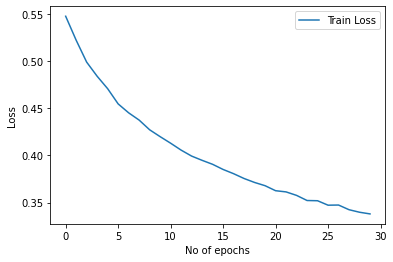

In [72]:
#plotting the loss
plt.plot(train_loss, label='Train Loss')
plt.xlabel('No of epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [76]:
test_loss = 0
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))


net.eval()
for images, labels in testing:
  #forword pass 
  output = net(images)
  #calculate the loss
  loss = criterion(output, labels)
  #update the test loss
  test_loss += loss.item()*images.size(0)
  # convert output probabilities to predicted class
  _, pred = torch.max(output, 1)
  #compare predictions to the true labes
  correct = np.squeeze(pred.eq(labels.data.view_as(pred)))
  #calculate test accuracy for each object class
  for i in range(len(labels)):
    label = labels.data[i]
    class_correct[label] += correct[i].item()
    class_total[label] +=1

#calcaulate and prınt test loss
test_loss = test_loss/len(testing.sampler)
print('Test Loss: {:.3f}\n'.format(test_loss))

for i in range(10):
  if class_total[i] > 0:
    print('Test Accuracy of %5s: %2d%% (%2d/%2d)'%
          (str(i), 100 * class_correct[i]/class_total[i],
           np.sum(class_correct[i]), np.sum(class_total[i])))
  else:
    print('Test Accuracy of %5s: N/A(no training examples)' % classes[i])

print('\nTest Accuracy (Overall): %2d%% (%2d/%2d)' % (
    100. * np.sum(class_correct) / np.sum(class_total),
    np.sum(class_correct), np.sum(class_total)))

Test Loss: 0.353

Test Accuracy of     0: 83% (837/1000)
Test Accuracy of     1: 96% (961/1000)
Test Accuracy of     2: 79% (790/1000)
Test Accuracy of     3: 90% (907/1000)
Test Accuracy of     4: 77% (779/1000)
Test Accuracy of     5: 94% (948/1000)
Test Accuracy of     6: 64% (641/1000)
Test Accuracy of     7: 95% (951/1000)
Test Accuracy of     8: 96% (966/1000)
Test Accuracy of     9: 94% (945/1000)

Test Accuracy (Overall): 87% (8725/10000)
